Name | Matr.Nr. | Due Date
:--- | ---: | ---:
Prem Kumar | K12246168 | 20.10.2024, 22:00

<h1 style="color:rgb(0,120,170)">Hands-on AI I</h1>
<h2 style="color:rgb(0,120,170)">Unit 1 &ndash; Tabular Data and Dimensionality Reduction</h2>

<b>Authors:</b> J. Brandstetter, B. Schäfl, A. Schörgenhumer, R. Dangl<br>
<b>Date:</b> 01-10-2024

This file is part of the "Hands-on AI I" lecture material. The following copyright statement applies to all code within this file.

<b>Copyright statement:</b><br>
This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

<h3 style="color:rgb(0,120,170)">How to use this notebook</h3>

This notebook is designed to run from start to finish. There are different tasks (displayed in <span style="color:rgb(248,138,36)">orange boxes</span>) which require your contribution (in form of code, plain text, ...). Most/All of the supplied functions are imported from the file <code>u1_utils.py</code> which can be seen and treated as a black box. However, for further understanding, you can look at the implementations of the helper functions. In order to run this notebook, the packages which are imported at the beginning of <code>u1_utils.py</code> need to be installed.

<h2>Exercise 1</h2>

<div class="alert alert-warning">
    <b>Exercise 1.1. [3 Points]</b>
    <ul>
        <li>Import the same modules as discussed in the lecture notebook.</li>
    </ul>
</div>

In [3]:
# your code goes here
import u1_utils as u1

import numpy as np
import seaborn as sns

sns.set_theme()

u1.setup_jupyter()

<div class="alert alert-warning">
    <b>Exercise 1.2. [2 Points]</b>
    <ul>
        <li>Check if your module versions are correct.</li>
    </ul>
</div>

In [4]:
# your code goes here
u1.check_module_versions()

Installed Python version: 3.12 (✓)
Installed numpy version: 2.1.2 (✓)
Installed pandas version: 2.2.3 (✓)
Installed scikit-learn version: 1.5.2 (✓)
Installed matplotlib version: 3.9.2 (✓)
Installed seaborn version: 0.13.2 (✓)


<h2>Exercise 2</h2>

We will start with a relatively easy (in terms of number of observations/number of features) dataset, the penguin data set by

Horst AM, Hill AP, Gorman KB (2020). palmerpenguins: Palmer Archipelago (Antarctica) penguin data. R package version 0.1.0. https://allisonhorst.github.io/palmerpenguins/. doi: 10.5281/zenodo.3960218.

It describes measurements of three penguin species. Use the provided functions in `u1_utils.py` to solve the following exercises.

<div class="alert alert-warning">
    <b>Exercise 2.1. [5 Points]</b>
    <ul>
        <li>Load the penguin dataset with <code>u1.load_penguins()</code>.</li>
    </ul>
</div>

In [6]:
# your code goes here
penguin_dataset = u1.load_penguins()

<div class="alert alert-warning">
    <b>Exercise 2.2. [5 Points]</b>
    <ul>
        <li>Display the dataframe of the penguin dataset, the feature information for the entire dataframe and value counts for the species feature</li>
    </ul>
</div>

In [19]:
# your code goes here
penguin_dataset

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,0,39.1,18.7,181.0,3750.0
1,0,39.5,17.4,186.0,3800.0
2,0,40.3,18.0,195.0,3250.0
3,0,36.7,19.3,193.0,3450.0
4,0,39.3,20.6,190.0,3650.0
...,...,...,...,...,...
328,1,55.8,19.8,207.0,4000.0
329,1,43.5,18.1,202.0,3400.0
330,1,49.6,18.2,193.0,3775.0
331,1,50.8,19.0,210.0,4100.0


In [12]:
# your code goes here
penguin_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    int8   
 1   bill_length_mm     333 non-null    float64
 2   bill_depth_mm      333 non-null    float64
 3   flipper_length_mm  333 non-null    float64
 4   body_mass_g        333 non-null    float64
dtypes: float64(4), int8(1)
memory usage: 10.9 KB


In [13]:
# your code goes here
penguin_dataset.value_counts('bill_depth_mm')

bill_depth_mm
17.0    12
15.0    10
18.5    10
17.9    10
18.6    10
        ..
20.1     1
20.6     1
20.5     1
20.8     1
21.5     1
Name: count, Length: 79, dtype: int64

<div class="alert alert-warning">
    <b>Exercise 2.3. [5 Points]</b>
    <ul>
        <li>How many dimensions does the dataset have, i.e., how long is the feature vector of each sample (not counting the class label column <code>species</code>)?</li>
        <li>What are the values of the three classes?</li>
        <li>How many samples are there in total?</li>
    </ul>
</div>

Dimensions: 4

Classes: 0, 1, 2

Samples: 333

<h2>Exercise 3</h2>

<div class="alert alert-warning">
    <b>Exercise 3.1. [5 Points]</b>
    <ul>
        <li>Show the location measures for the dataset.</li>
    </ul>
</div>

In [20]:
# your code goes here
penguin_dataset.drop(columns=['species'], inplace=False).describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


<div class="alert alert-warning">
    <b>Exercise 3.2. [5 Points]</b>
    <ul>
        <li>Show the boxplots for the 4 descriptor features split by species</li>
    </ul>
</div>

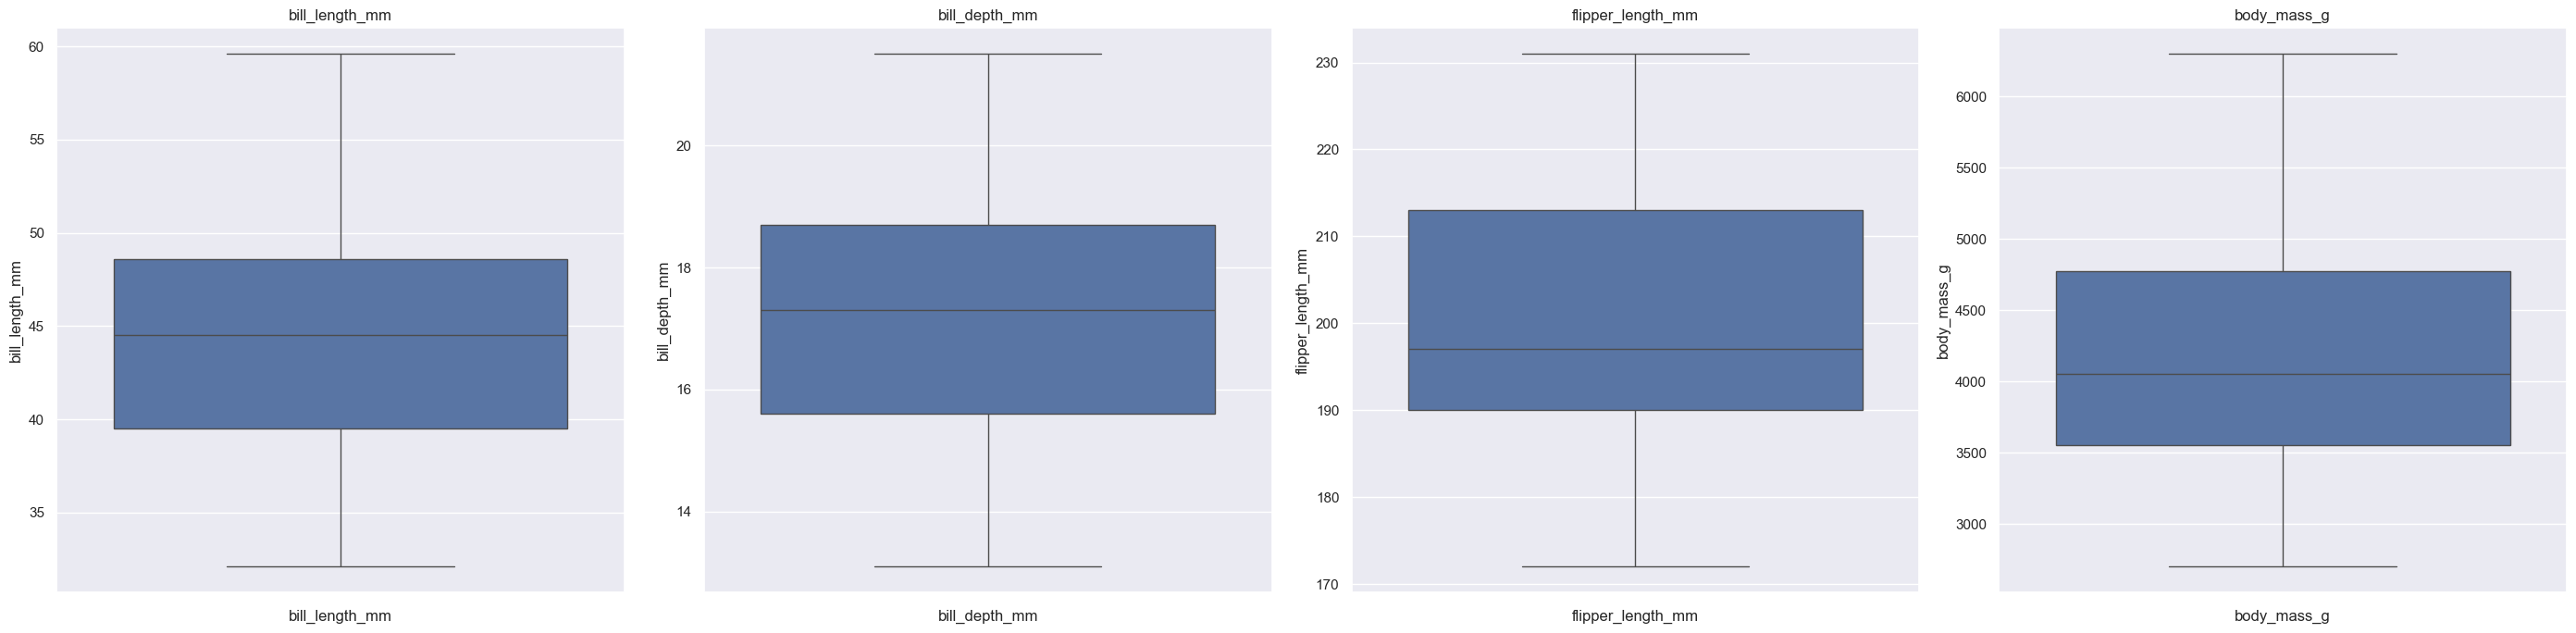

In [21]:
# your code goes here
u1.boxplots(data=penguin_dataset, features=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'])

<div class="alert alert-warning">
    <b>Exercise 3.3. [5 Points]</b>:
    <ul>
        <li>How can we spot outliers? Can you see any in the boxplots?</li>
    </ul>
</div>

usually, the outliers are shown on the above of top line 

but here clearly we can see that there are no outlers

<div class="alert alert-warning">
    <b>Exercise 3.4. [5 Points]</b>:
    <ul>
        <li>Create histograms for the 4 features again split by species.</li>
    </ul>
</div>

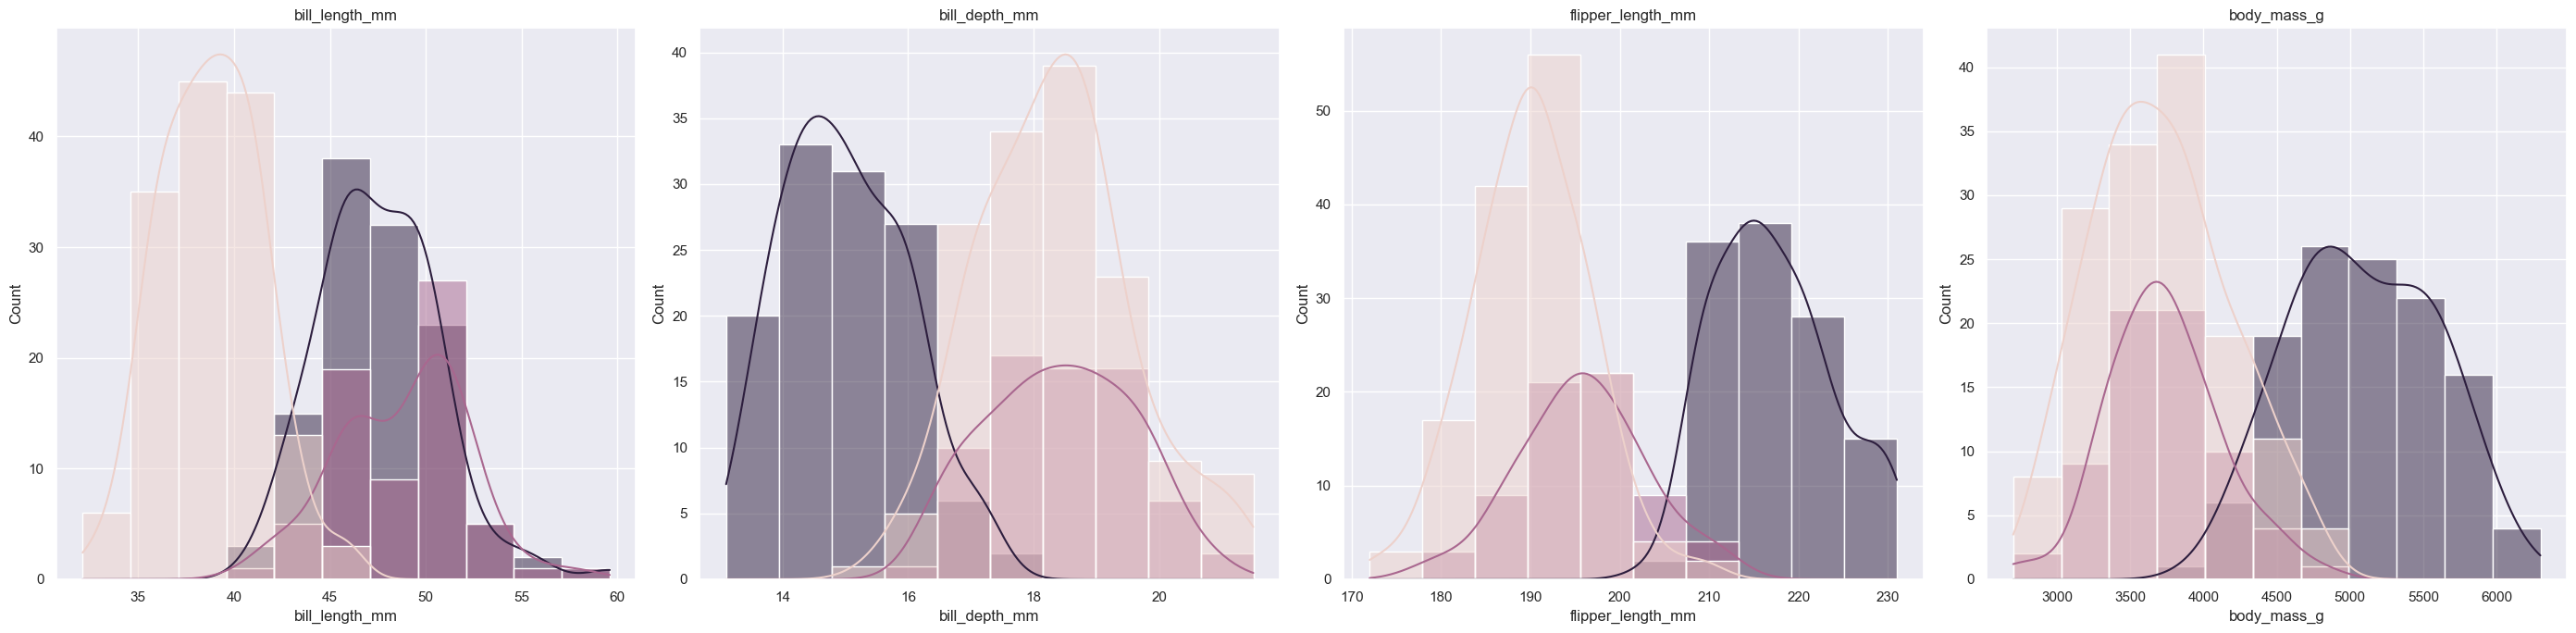

In [31]:
# your code goes here
u1.histograms(data=penguin_dataset, features=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], target_column='species')

<div class="alert alert-warning">
    <b>Exercise 3.4. [5 Points]</b>:
    <ul>
        <li>When you look at the kernel density estimations per group in the features, what do you notice?</li>
    </ul>
</div>

by kernel density estimations, we notice that 

Adelie is separated in KDE of bill_length_mm

Genetoo is separated by KDE of bill_depth_mm

Adilie and Chinstrap are overlapped with each other in KDE of bill_depth_mm, body_mass_g

<h2>Exercise 4</h2>

<div class="alert alert-warning">
    <b>Exercise 4.1. [10 Points]</b>
    <ul>
        <li>Make a feature correlation plot of all features. Color the data points according to their "species".</li>
    </ul>
</div>

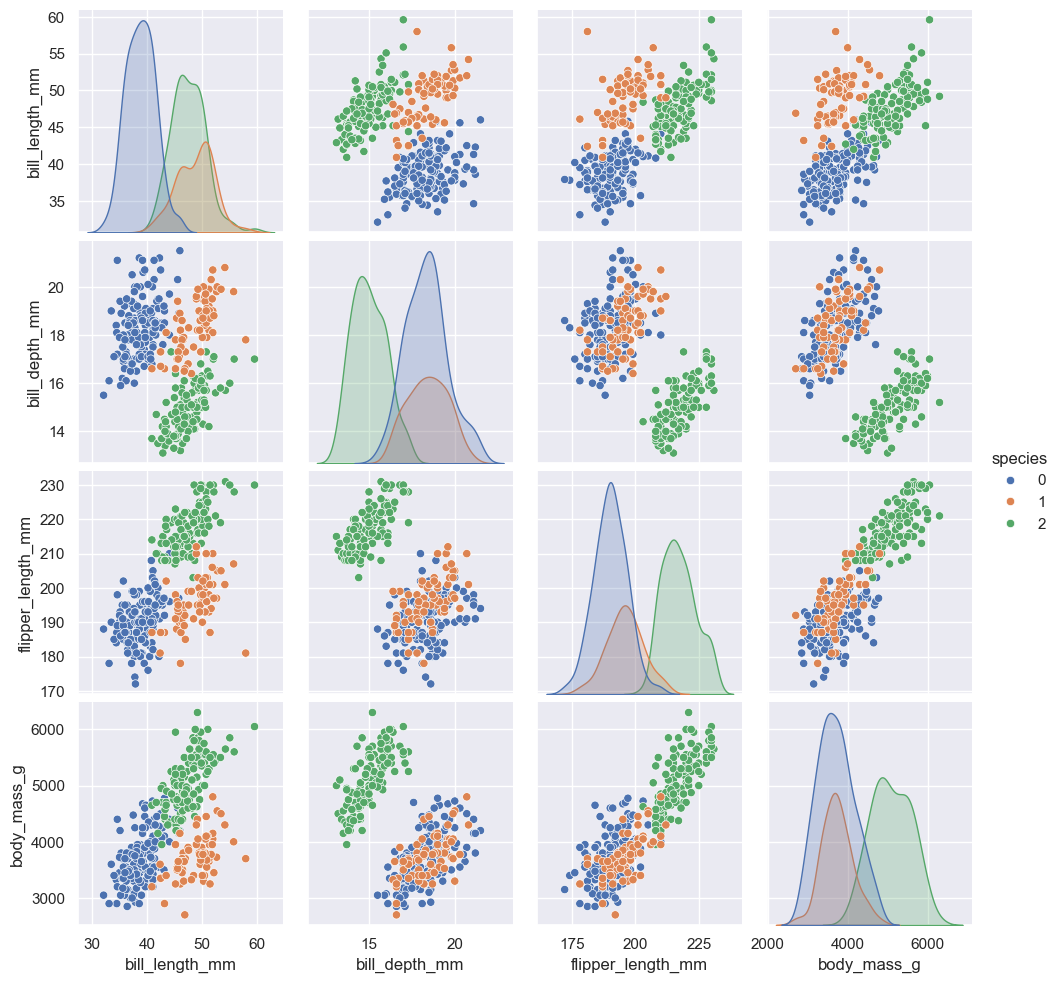

In [28]:
# your code goes here
u1.plot_features(data=penguin_dataset, features=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], target_column='species')			

<div class="alert alert-warning">
    <b>Exercise 4.2. [5 Points]</b>
    <ul>
        <li>We want to create a scatterplot that gives us the best separation visualization of the three classes. Which feature combination is most suitable for that purpose?</li>
    </ul>
</div>

probably the bill_length_mm and bill_depth_mm

<div class="alert alert-warning">
    <b>Exercise 4.3. [5 Points]</b>
    <ul>
        <li>Create a scatterplot using the two features that you chose in exercise 4.2. Color the data points by species.</li>
    </ul>
</div>

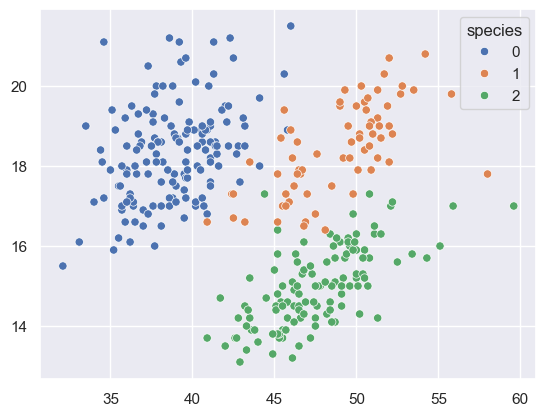

In [30]:
# your code goes here
u1.scatterplot(data=penguin_dataset, plotting_features=['bill_length_mm', 'bill_depth_mm'], target_column='species')

<div class="alert alert-warning">
    <b>Exercise 4.4. [5 Points]</b>
    <ul>
        <li>Why do you think that this combination of features work to separate the three groups (hint: look at the histograms again)?</li>
    </ul>
</div>

because these datas can be easily separable by straight lines 

<div class="alert alert-warning">
    <b>Exercise 4.2. [12 Points]</b>
    <ul>
        <li>Reduce the dimensionality of the features via PCA to 2 dimensions and plot the result.</li>
        <li>Note: Setting the seed for the random number generator <code>np.random.seed(seed=...)</code> is not necessary but useful if you want to ensure reproducible results.</li>
    </ul>
</div>

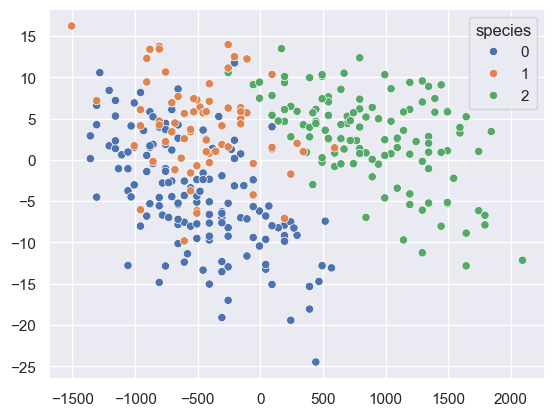

In [35]:
np.random.seed(seed=22)

# your code goes here
penguin_data_pca = u1.apply_pca(n_components=2, data=penguin_dataset, target_column='species')
u1.scatterplot(data=penguin_data_pca, target_column='species')


<div class="alert alert-warning">
    <b>Exercise 4.3. [12 Points]</b>
    <ul>
        <li>Reduce the dimensionality of the features via t-SNE to 2 dimensions and plot the result.</li>
        <li>Play around with the perplexity and find a value that yields a visually satisfying output (where the three classes are separable to some degree). Try values in the range $[5, 50]$.</li> Can you find a good value? Interpret the result you get.
        <li>Note: Setting the seed for the random number generator <code>np.random.seed(seed=...)</code> is not necessary but useful if you want to ensure reproducible results.</li>
    </ul>
</div>

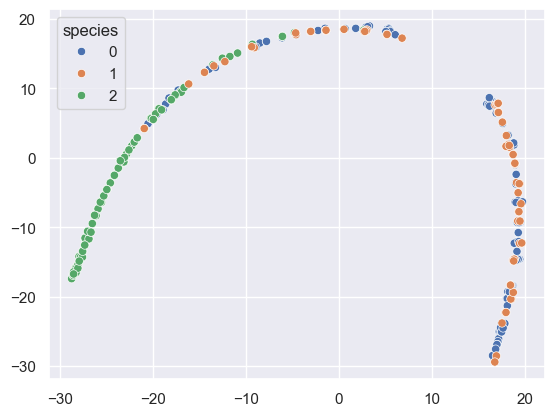

In [61]:
np.random.seed(seed=22)

# your code goes here
penguin_data_tsne = u1.apply_tsne(n_components=2, data=penguin_dataset, perplexity=20.00, target_column='species')
u1.scatterplot(data=penguin_data_tsne, target_column='species')

perplexity = 20.00 is the best value i could find, it's not good, there might be some better value than this 

<div class="alert alert-warning">
    <b>Exercise 4.4. [6 Points]</b>
    <ul>
        <li>Given the above visualizations, what (if anything) can you tell about the separability of the classes?</li>
    </ul>
</div>

body_mass_g has the worst separability of the classes

bill_length_mm is the best separability of the classes